In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
print("La versión de pandas es :", pd.__version__)

La versión de pandas es : 2.0.3


In [2]:
df = pd.read_csv('UNSW_NB15_withoutIP.csv', low_memory=False)


In [3]:
# Revisar tipos de columnas
print(df.dtypes.value_counts())

# Mostrar columnas no numéricas
print(df.select_dtypes(exclude=[np.number]).columns)

int64      193
float64     12
Name: count, dtype: int64
Index([], dtype='object')


In [13]:
# Calcular la correlación de cada feature con Label
correlation = df.corr()['Label'].sort_values(ascending=False)

# Mostrar las 20 features mas relacionadas con el target(label)
print("Top 20 features más correlacionadas con Label:")
print(correlation.head(20))

# Mostrar las 20 features menos relacionadas con el target(label)
print("\nTop 20 features menos correlacionadas con Label:")
print(correlation.tail(20))


Top 20 features más correlacionadas con Label:
Label               1.000000
attack_cat_num      0.832990
sttl                0.828652
ct_state_ttl        0.746801
state_INT           0.554131
ct_dst_sport_ltm    0.472105
dttl                0.440420
tcprtt              0.312581
ackdat              0.311367
ct_src_dport_ltm    0.292882
synack              0.278003
proto_unas          0.244941
Sload               0.237721
ct_dst_src_ltm      0.201345
service_dns         0.101120
service_pop3        0.092371
Sjit                0.076896
proto_sctp          0.068098
proto_udp           0.065350
ct_srv_src          0.063927
Name: Label, dtype: float64

Top 20 features menos correlacionadas con Label:
service_ssh        -0.041203
service_ftp-data   -0.053633
ct_dst_ltm         -0.053793
dbytes             -0.053891
dloss              -0.067709
Spkts              -0.070006
Dpkts              -0.081255
sport              -0.084409
stcpb              -0.104588
dtcpb              -0.107402
Ltime

In [17]:
low_corr_features = [
    "service_ssh", "service_ftp-data", "ct_dst_ltm", "dbytes", "dloss",
    "Spkts", "Dpkts", "sport", "stcpb", "dtcpb", "Ltime", "Stime",
    "state_FIN", "dwin", "swin", "proto_tcp", "state_CON", "dsport",
    "Dload", "dmeansz"
]

#  Definir X e y
X = df.drop(columns=[
    'attack_cat_num',
    'ct_dst_src_ltm',
    'Sload',
    'ct_src_dport_ltm',
    'ct_dst_sport_ltm',
    'sttl',
    'ct_state_ttl',
    'state_INT',
    'dttl',
    'tcprtt',
    'ackdat',
    'Label',
    'attack_cat'
], errors='ignore')
y = df['Label']


#  Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#  Entrenar modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#  Hacer predicciones
y_pred = model.predict(X_test)

#  Evaluar
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9967728484145258
Confusion Matrix:
 [[50672   108]
 [   70  4307]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50780
           1       0.98      0.98      0.98      4377

    accuracy                           1.00     55157
   macro avg       0.99      0.99      0.99     55157
weighted avg       1.00      1.00      1.00     55157



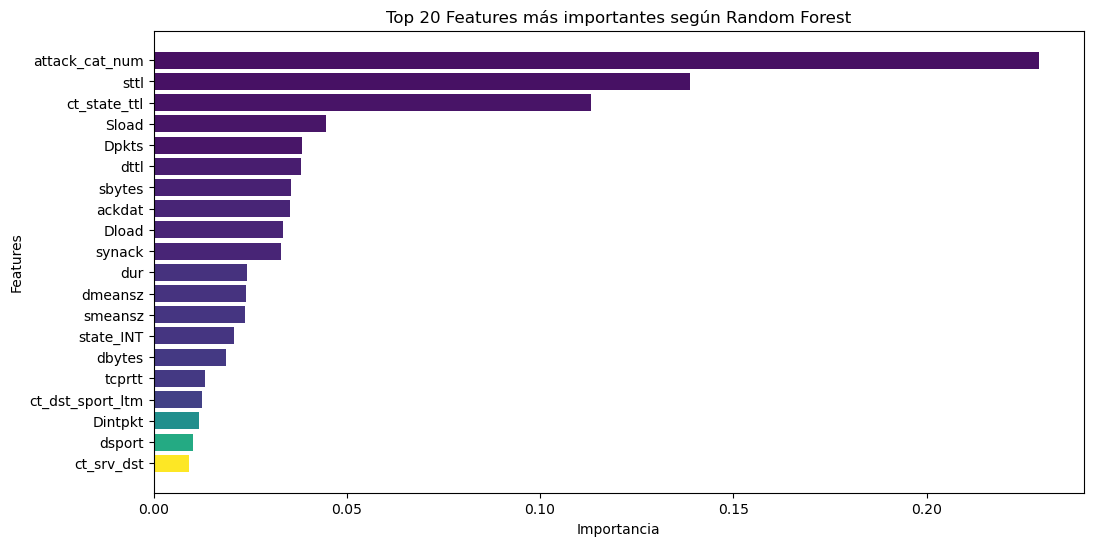

In [23]:
# Definir X e y
X = df.drop(columns=['Label', 'attack_cat'], errors='ignore')
y = df['Label']

# Entrenar Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Obtener importancia de features
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)

# Graficar usando Matplotlib
plt.figure(figsize=(12,6))
colors = plt.cm.viridis(top_features.values / top_features.values.max())
plt.barh(top_features.index[::-1], top_features.values[::-1], color=colors)
plt.xlabel("Importancia")
plt.ylabel("Features")
plt.title("Top 20 Features más importantes según Random Forest")
plt.show()


In [ ]:
# En el grafico se puede observar como algunas variables como attack_cat_num , sttl y ct_state_ttl tiene va muy ligado al label
# Con lo cual esto puede generar leakage y lo mejor seria eliminarlos para tener un modelo mas realista.
